Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 1.0127 - accuracy: 0.7274 - val_loss: 0.5057 - val_accuracy: 0.8758
Epoch 2/20
750/750 [==============================] - 1s 944us/step - loss: 0.5202 - accuracy: 0.8549 - val_loss: 0.3837 - val_accuracy: 0.8996
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.4345 - accuracy: 0.8764 - val_loss: 0.3379 - val_accuracy: 0.9092
Epoch 4/20
750/750 [==============================] - 1s 804us/step - loss: 0.3894 - accuracy: 0.8896 - val_loss: 0.3093 - val_accuracy: 0.9145
Epoch 5/20
750/750 [==============================] - 1s 784us/step - loss: 0.3578 - accuracy: 0.8979 - val_loss: 0.2884 - val_accuracy: 0.9197
Epoch 6/20
750/750 [==============================] - 1s 808us/step - loss: 0.3354 - accuracy: 0.9052 - val_loss: 0.2718 - val_accuracy: 0.9244
Epoch 7/20
750/750 [==============================] - 1s 791us/step - loss: 0.3146 - accuracy: 0.9112 - val_loss: 0.2574 - val_accuracy: 0.9

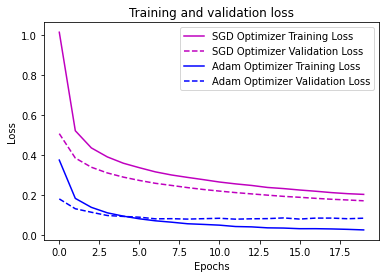

In [79]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x = np.append(x_train,x_test)
y = np.append(y_train,y_test)
# Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

predictions = model(x_train[:1]).numpy()
predictions

# The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

tf.nn.softmax(predictions).numpy()

# Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
# provide an exact and numerically stable loss calculation for all models when using a softmax output. 

# The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# This loss is equal to the negative log probability of the true class:
# It is zero if the model is sure of the correct class.

# This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])

# The `Model.fit` method adjusts the model parameters to minimize the loss: 

history = model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=20)

train_loss1 = history.history["loss"]
val_loss1 = history.history["val_loss"]


#----------------------USING ADAM----------------------------
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x = np.append(x_train,x_test)
y = np.append(y_train,y_test)
# Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

predictions = model(x_train[:1]).numpy()
predictions

# The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

tf.nn.softmax(predictions).numpy()

# Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
# provide an exact and numerically stable loss calculation for all models when using a softmax output. 

# The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# This loss is equal to the negative log probability of the true class:
# It is zero if the model is sure of the correct class.

# This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

loss_fn(y_train[:1], predictions).numpy()


# print(train_loss,'m')
# plt.plot(train_loss)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# The `Model.fit` method adjusts the model parameters to minimize the loss: 

history = model.fit(x_train, y_train, batch_size=64, validation_split=0.2, shuffle=True,epochs=20)
train_loss2 = history.history["loss"]
val_loss2 = history.history["val_loss"]
# plt.plot(train_loss,'r')
# plt.show()
# print(history.history)

plt.plot(train_loss1,'m',label='SGD Optimizer Training Loss')
plt.plot(val_loss1,'m--',label='SGD Optimizer Validation Loss')
plt.plot(train_loss2,'b',label='Adam Optimizer Training Loss')
plt.plot(val_loss2,'b--',label='Adam Optimizer Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()